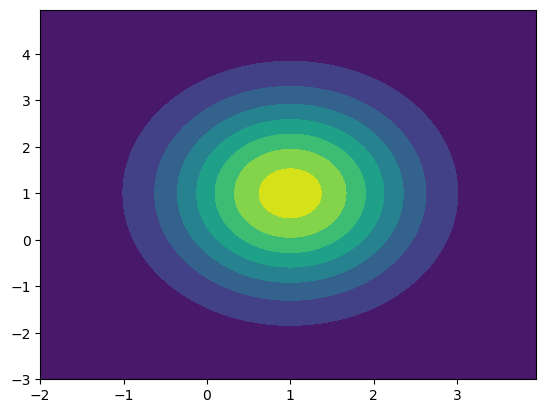

In [336]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal


# 3.1
def plot_normal(mean, cov, scale):
    x, y = scale
    pos = np.dstack((x, y))
    rv = multivariate_normal(mean, cov)
    ax = plt.figure().add_subplot(111)
    ax.contourf(x, y, rv.pdf(pos))

plot_normal([1,1], [[1,0],[0,2]], np.mgrid[-2:4:.05, -3:5:.05])

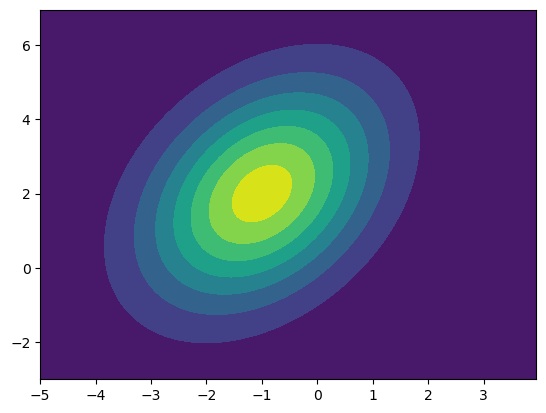

In [337]:
# 3.2

plot_normal([-1,2],[[2,1],[1,4]], np.mgrid[-5:4:.05, -3:7:.05])

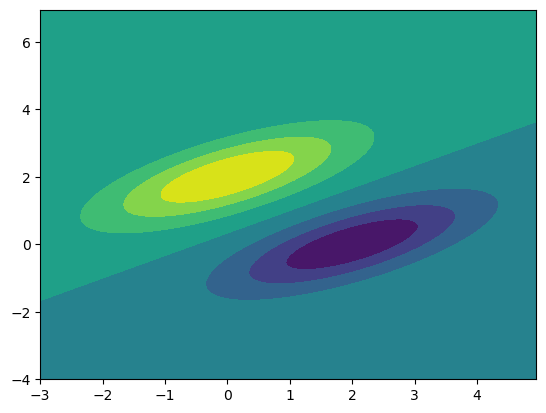

In [338]:
# 3.3
def plot_normal_dif(mean1, mean2, cov1, cov2, scale):
    x, y = scale
    pos = np.dstack((x, y))
    rv1 = multivariate_normal(mean1, cov1)
    rv2 = multivariate_normal(mean2, cov2)
    ax2 = plt.figure().add_subplot(111)
    ax2.contourf(x, y, rv1.pdf(pos) - rv2.pdf(pos))

plot_normal_dif([0,2], [2,0], [[2,1], [1,1]], [[2,1],[1,1]], np.mgrid[-3:5:.05, -4:7:.05])

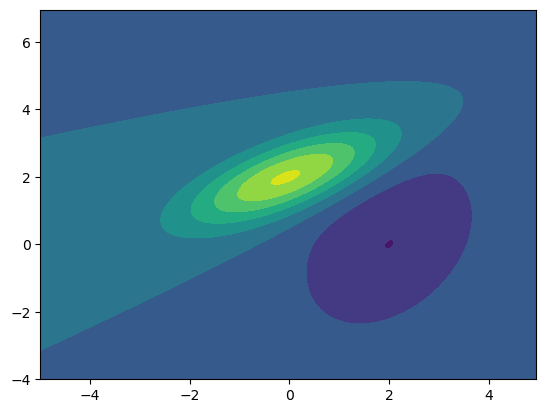

In [339]:
# 3.4

plot_normal_dif([0,2], [2,0], [[2,1], [1,1]], [[2,1],[1,4]], np.mgrid[-5:5:.05, -4:7:.05])

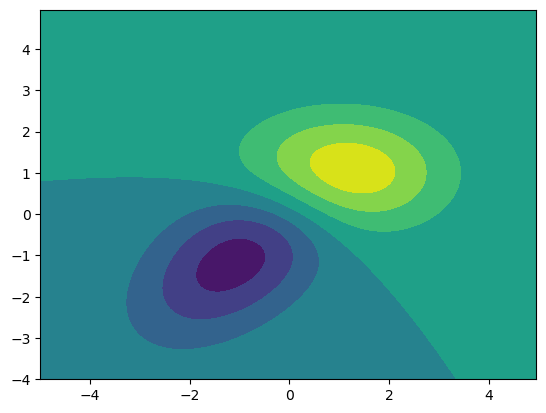

In [340]:
# 3.5

plot_normal_dif([1,1], [-1,-1], [[2,0], [0,1]], [[2,1],[1,2]], np.mgrid[-5:5:.05, -4:5:.05])

In [341]:
# 4.1 Compute mean of sample points.

np.random.seed(200)

mu1, sigma1 = 3, 3
mu2, sigma2 = 4, 2
X1 = np.random.normal(mu1, sigma1, 100)
X2 = np.dot(X1, 0.5) + np.random.normal(mu2, sigma2, 100)

mean = (np.average(X1), np.average(X2))
print(mean)

(3.4394272834889095, 5.722951071040841)


In [342]:
# 4.2 Compute the 2 × 2 covariance matrix of the sample
    
def compute_cov(mu1, mu2, X1, X2):
    cov = 0
    for i in range(100):
        cov += (X1[i] - mu1) * (X2[i] - mu2)
    return cov / len(X1)
      
mu1, mu2 = mean[0], mean[1]
cov_X1_X1 = compute_cov(mu1, mu1, X1, X1)
cov_X2_X2 = compute_cov(mu2, mu2, X2, X2)
cov_X1_X2 = compute_cov(mu1, mu2, X1, X2)

cov_matrix = [[cov_X1_X1, cov_X1_X2],[cov_X1_X2, cov_X2_X2]]
print(cov_matrix)

[[9.607491470436242, 5.8074839587378735], [5.8074839587378735, 6.485901857521746]]


In [343]:
# 4.3 Compute eigenvectors and eigenvalues of covariance matrix.

from numpy import linalg as LA
eigenvalues, eigenvectors = LA.eig(cov_matrix)
eigenvector1 = [eigenvectors[0][0], eigenvectors[1][0]]
eigenvector2 = [eigenvectors[0][1], eigenvectors[1][1]]
print(eigenvalues[0], eigenvector1)
print(eigenvalues[1], eigenvector2)


14.060260529014574 [0.7935822979398991, 0.6084629293526674]
2.0331327989434165 [-0.6084629293526674, 0.7935822979398991]


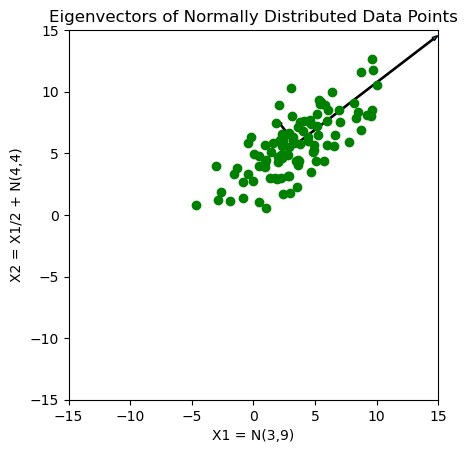

In [344]:
# 4.4 Plot sample points and eigenvectors

plt.arrow(mu1, mu2, eigenvector1[0] * eigenvalues[0], eigenvector1[1] * eigenvalues[0], width = 0.1)
plt.arrow(mu1, mu2, eigenvector2[0] * eigenvalues[1], eigenvector2[1] * eigenvalues[1], width = 0.1)
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.xlabel('X1 = N(3,9)')
plt.ylabel('X2 = X1/2 + N(4,4)')
plt.title('Eigenvectors of Normally Distributed Data Points')

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.plot(X1, X2, 'go')

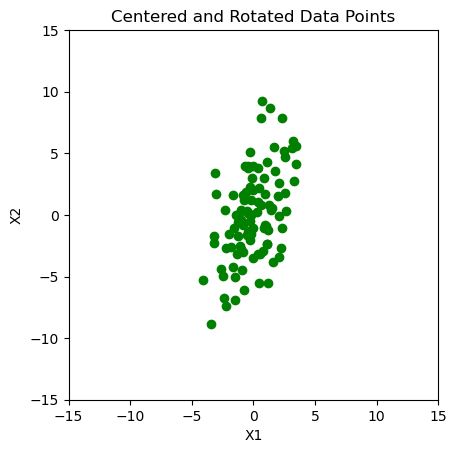

In [345]:
# 4.5 Center and rotate points

U_t = eigenvectors
X1_centered = X1 - mu1
X2_centered = X2 - mu2

X1_rotated = []
X2_rotated = []
for i in range(100):
    new_pt = U_t.dot([X1_centered[i], X2_centered[i]])
    X1_rotated.append(new_pt[0])
    X2_rotated.append(new_pt[1])
    
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Centered and Rotated Data Points')

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.plot(X1_rotated, X2_rotated, 'go')

In [346]:
# Problem 8

import sys
if sys.version_info[0] < 3:
	raise Exception("Python 3 not detected.")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from scipy import io

if __name__ == "__main__":
    for data_name in ["mnist", "spam"]:
        data = np.load(f"../data/{data_name}-data-hw3.npz")
        print("\nloaded %s data!" % data_name)
        fields = "test_data", "training_data", "training_labels"
        for field in fields:
            print(field, data[field].shape)


loaded mnist data!
test_data (10000, 1, 28, 28)
training_data (60000, 1, 28, 28)
training_labels (60000,)

loaded spam data!
test_data (1000, 32)
training_data (4172, 32)
training_labels (4172,)


In [347]:
# Setting fields
mnist_data = np.load(f"../data/mnist-data-hw3.npz")
spam_data = np.load(f"../data/spam-data-hw3.npz")

mnist_test_data = mnist_data["test_data"]
mnist_training_data = mnist_data["training_data"]
mnist_training_labels = mnist_data["training_labels"]
spam_test_data = spam_data["test_data"]
spam_training_data = spam_data["training_data"]
spam_training_labels = spam_data["training_labels"]    

In [348]:
# 8.1 Fit a Gaussian distribution to pixel values using MLE.

from scipy.cluster.vq import whiten

# Normalize images.
whiten(mnist_test_data)
whiten(mnist_training_data)

array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       ...,


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]

In [349]:
# Flatten data

def flatten_data(data):
    flattened_data = []
    for d in data:
        flattened_data.append(d.flatten())
    return flattened_data

mnist_training_data = flatten_data(mnist_training_data)
mnist_test_data = flatten_data(mnist_test_data)
spam_training_data = flatten_data(spam_training_data)
spam_test_data = flatten_data(spam_test_data)

In [350]:
# Fitting Gaussians using MLE

# Compute mean and variance of Gaussian.
def gaussian_mean(data):
    return np.mean(data, axis = 0)

def gaussian_cov(data):
    return np.cov(data, rowvar = False)

def classify_digits(data, labels):
    zero, one, two, three, four, five, six, seven, eight, nine = [],[],[],[],[],[],[],[],[],[]
    for i in range(len(labels)):
        label = labels[i]
        if label == 0:
            zero.append(data[i])
        elif label == 1:
            one.append(data[i])
        elif label == 2:
            two.append(data[i])
        elif label == 3:
            three.append(data[i])
        elif label == 4:
            four.append(data[i])
        elif label == 5:
            five.append(data[i])
        elif label == 6:
            six.append(data[i])
        elif label == 7:
            seven.append(data[i])
        elif label == 8:
            eight.append(data[i])
        elif label == 9:
            nine.append(data[i])
    return zero, one, two, three, four, five, six, seven, eight, nine

In [351]:
def classify_spam(data, labels):
    zero, one = [], []
    for i in range(len(labels)):
        label = labels[i]
        if label == 0:
            zero.append(data[i])
        elif label == 1:
            one.append(data[i])
    return zero, one

In [352]:
zero, one, two, three, four, five, six, seven, eight, nine = classify_digits(mnist_training_data, mnist_training_labels)
mnist_data = [zero, one, two, three, four, five, six, seven, eight, nine]

In [353]:
zero, one = classify_spam(spam_training_data, spam_training_labels)
spam_data = [zero, one]

In [354]:
mnist_means = [0] * 10
mnist_covs = []
for i in range(10):
    mnist_means[i] = gaussian_mean(mnist_data[i])
    mnist_covs.append(gaussian_cov(mnist_data[i]))

In [355]:
spam_means = [0] * 2
spam_covs = []
for i in range(2):
    spam_means[i] = gaussian_mean(spam_data[i])
    spam_covs.append(gaussian_cov(spam_data[i]))

AxesImage(80,52.8;496x369.6)


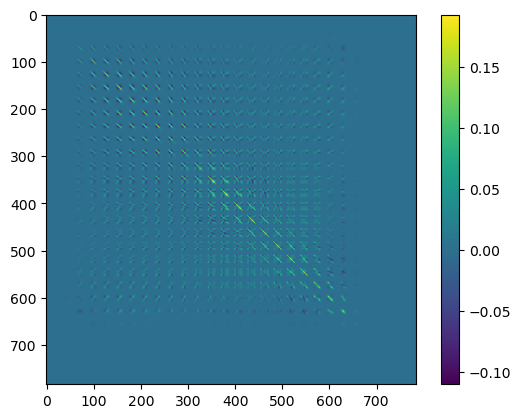

In [356]:
# 8.2 Visualize a covariance matrix for digit 6.

print(plt.imshow(mnist_covs[6]))
plt.colorbar()

In [357]:
# 8.3

# Returns indices for training_labels and training_data that are set aside for validation and for training.
def shuffle_partition(data, count, total):
    indices = np.arange(0, total, 1)
    np.random.shuffle(indices)
    return indices[0:count], indices[count:]

# Computes gaussians and classifies using LDA.
def compute_gaussians_LDA(data, means, cov):
    gaussians = []
    for i in range(len(means)):
        gaussians.append(multivariate_normal.logpdf(data, means[i], cov, allow_singular = True))
    predictions = np.argmax(gaussians, axis=0)
    return predictions

# Computes gaussians and classifies using LDA.
def compute_gaussians_QDA(data, means, covs):
    gaussians = []
    for i in range(len(means)):
        gaussians.append(multivariate_normal.logpdf(data, means[i], covs[i], allow_singular = True))
    predictions = np.argmax(gaussians, axis=0)
    return predictions
    
# Computes the error rate
def compute_error_rate(predictions, labels):
    num_correct = 0
    num_total = len(labels)
    for i in range(len(predictions)):
        if predictions[i] == labels[i]:
            num_correct += 1
    return 1 - (num_correct/num_total)

# Create plot. 
def create_plot(num_train, training_accuracy, plot_title):
    x = num_train
    y = error_rates
    plt.title(plot_title) 
    plt.ylabel('Error Rates') 
    plt.xlabel('Training Data')  
    plt.plot(x, y, label = "Error Rates")
    plt.legend()
    plt.show()

In [358]:
# Compute cooled within-class covariance
mnist_cov = np.zeros((784, 784))
total = 0
for i in range(10):
    mnist_cov += mnist_covs[i] * len(mnist_data[i])
    total += len(mnist_data[i])
mnist_cov = np.dot(mnist_cov, 1/total)

In [359]:
# Compute cooled within-class covariance for spam.
spam_cov = np.zeros((32, 32))
total = 0
for i in range(2):
    spam_cov += spam_covs[i] * len(spam_data[i])
    total += len(spam_data[i])
spam_cov = np.dot(spam_cov, 1/total)

In [360]:
# 10,000 training data set aside for validation.
mnist_validation_indices, mnist_training_indices = shuffle_partition(mnist_training_data, 10000, 60000)
num_training_pts = [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]
mnist_training_arrs, mnist_label_arrs = [], []
mnist_val_data_arrs, mnist_val_label_arrs = [], []

# Create mnist_training_arrs and mnist_label_arrs.
for num in num_training_pts:
    temp_train = []
    temp_labels = []
    for i in range(num):
        index = mnist_training_indices[i]
        temp_train.append(mnist_training_data[index])
        temp_labels.append(mnist_training_labels[index])
    mnist_training_arrs.append(temp_train)
    mnist_label_arrs.append(temp_labels)
    
for i in range(10000):
    index = mnist_validation_indices[i]
    mnist_val_data_arrs.append(mnist_training_data[index])
    mnist_val_label_arrs.append(mnist_training_labels[index])

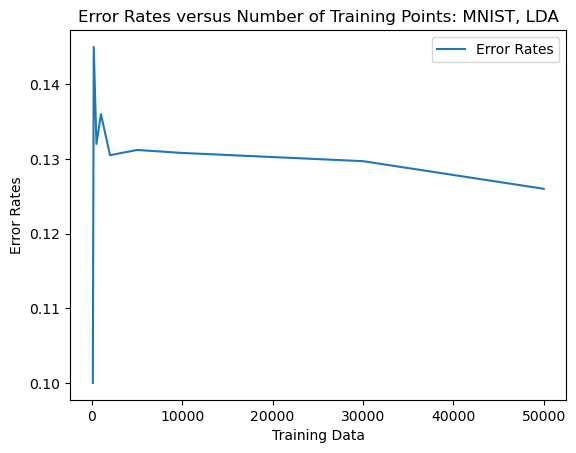

In [361]:
# 8.3 LDA

error_rates = []

# Compute predictions based on LDA
for i in range(len(mnist_training_arrs)): 
    LDA_predictions = compute_gaussians_LDA(mnist_training_arrs[i], mnist_means, mnist_cov)
    error_rates.append(compute_error_rate(LDA_predictions, mnist_label_arrs[i]))
    
# Plot error rate versus number of training points.
create_plot(num_training_pts, error_rates, "Error Rates versus Number of Training Points: MNIST, LDA")

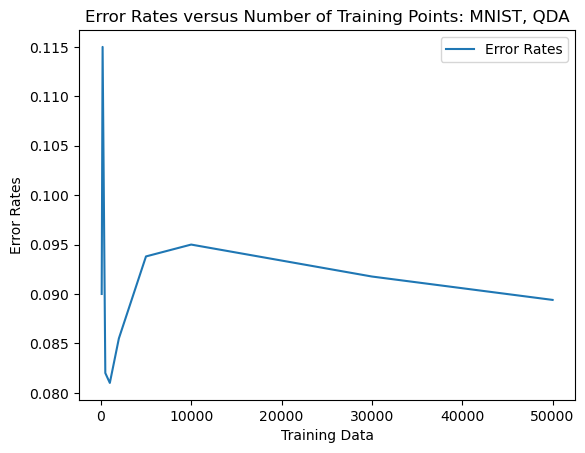

In [362]:
# 8.3 QDA

error_rates = []

# Compute predictions based on QDA
for i in range(len(mnist_training_arrs)): 
    QDA_predictions = compute_gaussians_QDA(mnist_training_arrs[i], mnist_means, mnist_covs)
    error_rates.append(compute_error_rate(QDA_predictions, mnist_label_arrs[i]))
    
# Plot error rate versus number of training points.
create_plot(num_training_pts, error_rates, "Error Rates versus Number of Training Points: MNIST, QDA")

In [363]:
import csv

header = ['Id', 'Category']
data = []

def create_file(prediction_file, file_name):
    for i in range(len(prediction_file)):
        data.append([i+1, prediction_file[i]])
    with open(file_name, 'w', newline = '') as f:
        writer = csv.writer(f, delimiter=',')
        writer.writerow(header)
        writer.writerows(data)
    f.close()

In [364]:
# Q8.4

QDA_mnist_predictions = compute_gaussians_QDA(mnist_test_data, mnist_means, mnist_covs)
create_file(QDA_mnist_predictions, "mnist_QDA.csv")

In [365]:
#8.5 

QDA_spam_predictions = compute_gaussians_QDA(spam_test_data, spam_means, spam_covs)
create_file(QDA_spam_predictions, "spam_QDA.csv")